In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [10]:
df.loc[(df["Runtime (Minutes)"] >= 180), ["Title"]]

,Title
82,The Wolf of Wall Street
88,The Hateful Eight
311,La vie d'Adèle
828,Grindhouse
965,Inland Empire


In [3]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [4]:
df.dropna(axis=0, inplace=True)

In [22]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [34]:
ax = df.groupby("Year")["Votes"].mean().sort_values(ascending=False)

<AxesSubplot: xlabel='Year'>

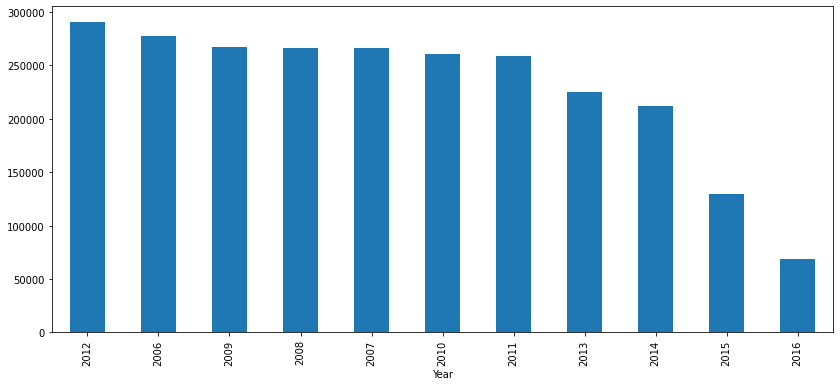

In [35]:
ax.plot(kind="bar", figsize=(14, 6))

In [37]:
ax = df.groupby("Year")["Revenue (Millions)"].mean().sort_values(ascending=False)

<AxesSubplot: xlabel='Year'>

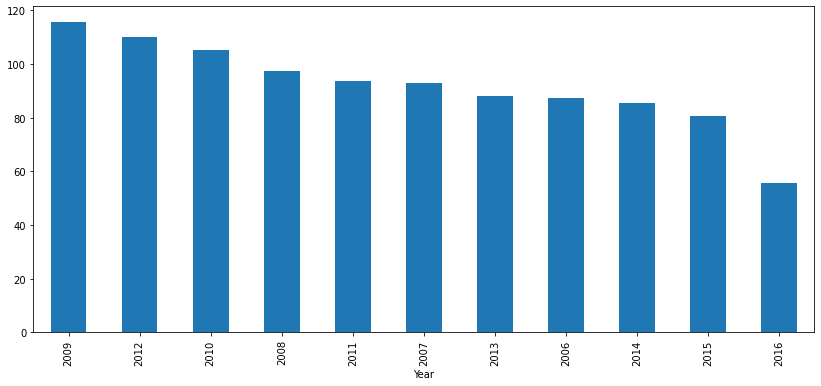

In [38]:
ax.plot(kind="bar", figsize=(14, 6))

In [39]:
df.groupby("Director")["Rating"].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [40]:
df.groupby("Year").count()

,Rank,Title,Genre,Description,Director,Actors,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,,,,,,,,,,,
2006,41,41,41,41,41,41,41,41,41,41,41
2007,44,44,44,44,44,44,44,44,44,44,44
2008,48,48,48,48,48,48,48,48,48,48,48
2009,45,45,45,45,45,45,45,45,45,45,45
2010,57,57,57,57,57,57,57,57,57,57,57
2011,57,57,57,57,57,57,57,57,57,57,57
2012,62,62,62,62,62,62,62,62,62,62,62
2013,84,84,84,84,84,84,84,84,84,84,84
2014,93,93,93,93,93,93,93,93,93,93,93


In [60]:
df.loc[(df["Revenue (Millions)"] == df["Revenue (Millions)"].max()), ["Title"]]

,Title
50,Star Wars: Episode VII - The Force Awakens


In [67]:
df.loc[(df["Rating"] == df["Rating"].max()), ["Title", "Director", "Rating"]].head(10)

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0


In [89]:
df.nlargest(10, "Runtime (Minutes)")[["Title", "Runtime (Minutes)"]].set_index("Title")

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


In [91]:
df.nlargest(10, "Rating")[["Title", "Director", "Rating"]]

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
64,The Prestige,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
124,The Dark Knight Rises,Christopher Nolan,8.5
133,Whiplash,Damien Chazelle,8.5
476,The Lives of Others,Florian Henckel von Donnersmarck,8.5


In [94]:
df.nlargest(10, "Revenue (Millions)")[["Title", "Revenue (Millions)"]]

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


In [96]:
df.groupby("Year")["Rating"].mean()

Year
2006    7.143902
2007    7.140909
2008    6.708333
2009    6.911111
2010    6.894737
2011    6.945614
2012    6.933871
2013    6.832143
2014    6.822581
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

In [99]:
df.head(15)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [8]:
df.nlargest(10, "Runtime (Minutes)")[["Title","Runtime (Minutes)"]].set_index("Title")

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


In [11]:
#Find average rating of movies year wise

df.groupby("Year")["Rating"].mean()

Year
2006    7.143902
2007    7.140909
2008    6.708333
2009    6.911111
2010    6.894737
2011    6.945614
2012    6.933871
2013    6.832143
2014    6.822581
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<AxesSubplot: xlabel='Rating', ylabel='Revenue (Millions)'>

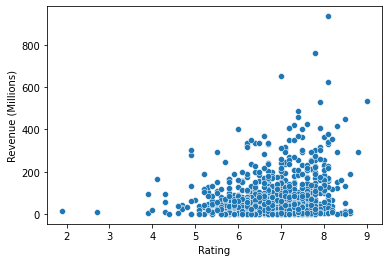

In [26]:
#Does rating affect the revenue

sns.scatterplot(x="Rating", y="Revenue (Millions)", data=df)

In [35]:
#Rating movies based on rating [Excellent, Good and Avarage]

def rating(rating):
    if rating > 5.:
        if rating >= 8.:
            return "Excellent"
        else:
            return "Good"
    else:
        return "Average"

In [36]:
df["Rates"] = df["Rating"].apply(rating)

In [38]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rates
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [44]:
#Count number of action movies

len(df[df["Genre"].str.contains("Action")])

277

In [45]:
#Find unique value in Genre

list1 = []
for genre in df["Genre"]:
    list1.append(genre.split(","))

In [46]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [47]:
list2 = []
for item in list1:
    for item1 in item:
        list2.append(item1)

In [48]:
list2

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [49]:
list3 = []
for item in list2:
    if item not in list3:
        list3.append(item)

In [53]:
list3

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [55]:
#How many films of each genre were made

from collections import Counter

Counter(list2)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})

# ------------------------------------------
Amazon data set

In [23]:
df = pd.read_csv("amazon.csv", encoding='ISO-8859-1')

In [24]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [9]:
df.shape

(6454, 5)

In [25]:
df.duplicated().sum()

32

In [26]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(6422, 5)

In [14]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [27]:
df["month"]

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [28]:
month_change = {
    "Janeiro":"January",
    "Fevereiro":"February",
    "Março":"March",
    "Abril":"April",
    "Maio":"May",
    "Junho":"June",
    "Julho":"July",
    "Agosto":"August",
    "Setembro":"September",
    "Outubro":"October",
    "Novembro":"November",
    "Dezembro":"December"
}

In [29]:
df["month_change"] = df["month"].map(month_change)

In [48]:
ax = df.groupby("month_change")["number"].sum()

<AxesSubplot: xlabel='month_change'>

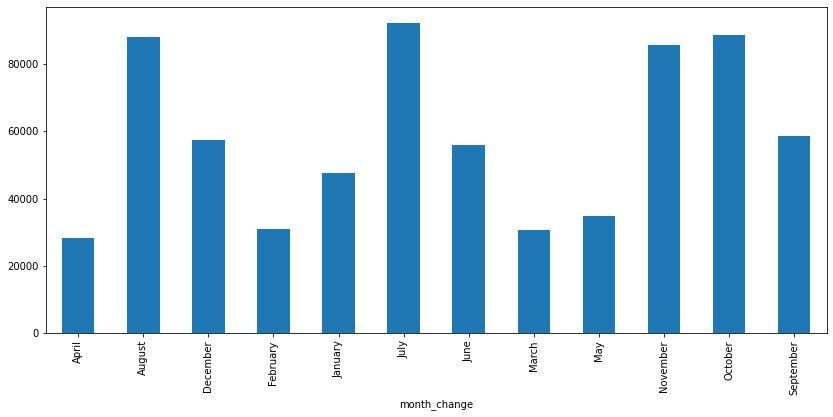

In [49]:
ax.plot(kind="bar", figsize=(14, 6))

In [55]:
yr = df.groupby("year")["number"].sum()

In [54]:
df.groupby("state")["number"].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

<AxesSubplot: xlabel='year'>

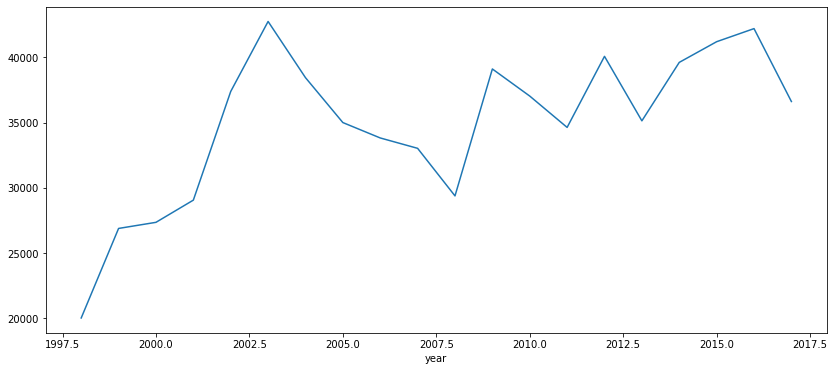

In [56]:
yr.plot(kind="line", figsize=(14, 6))

In [58]:
df["date"]

0       1998-01-01
1       1999-01-01
2       2000-01-01
3       2001-01-01
4       2002-01-01
           ...    
6449    2012-01-01
6450    2013-01-01
6451    2014-01-01
6452    2015-01-01
6453    2016-01-01
Name: date, Length: 6422, dtype: object

In [59]:
df_2015 = df.loc[(df["year"]==2015), ["number", "month_change"]]

In [60]:
df_2015.head()

,number,month_change
17,1.0,January
37,2.0,February
57,2.0,March
77,3.0,April
97,2.0,May


In [63]:
ax_2015 = df_2015.groupby("month_change")["number"].sum()

<AxesSubplot: xlabel='month_change'>

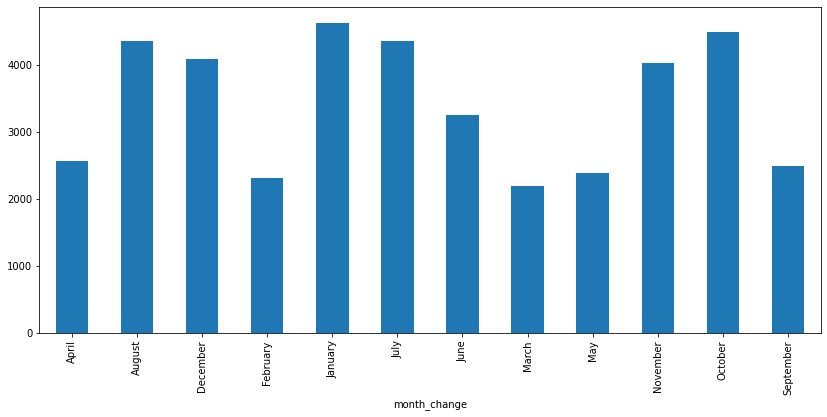

In [75]:
ax_2015.plot(kind="bar", figsize=(14, 6))

In [81]:
df.groupby("state")["number"].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [84]:
df.loc[(df["number"]>1) & (df["month_change"]=="December")]["state"]

220          Acre
226          Acre
227          Acre
233          Acre
235          Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 469, dtype: object